In [60]:
# pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_yn, spherical_jn

In [3]:

m1 = 939.565 #MeV/c^2
m2 = 3727.379 #MeV/c^2
hbar = 197 #MeV

mu = m1*m2/(m1+m2)

V0 = -15.0 #MeV
a = 6 #fm

In [4]:
def calculate_phase_shift(k, K, l):

    ka = k * a
    Ka = K * a
    
    delta_l = np.arctan2( (K*spherical_jn(l,Ka,True)*spherical_jn(l,ka) - (k*spherical_jn(l,Ka)*spherical_jn(l,ka,True))) , (k*spherical_jn(l,Ka)*(-1)*spherical_yn(l,ka,True) - (K*spherical_jn(l,Ka,True)*(-1)*spherical_yn(l,ka))) )

    return delta_l
    

In [5]:
def calculate_total_cross_sections(E_values, l_max):
    cross_sections = []
    for E in E_values:
        k = np.sqrt((2*mu*E)/hbar**2)
        kappa = np.sqrt((2*mu*(E-V0))/hbar**2)
        total_cross_section = 0.
        for l in range(l_max + 1):
            delta_l = calculate_phase_shift(k, kappa, l)
            total_cross_section += (2*l + 1) * (np.sin(delta_l)) ** 2
        cross_sections.append((4*np.pi / (k ** 2)) * total_cross_section)
    return cross_sections

In [6]:
E_values = np.linspace(0.1, 20.0, 100)
l_max = 0


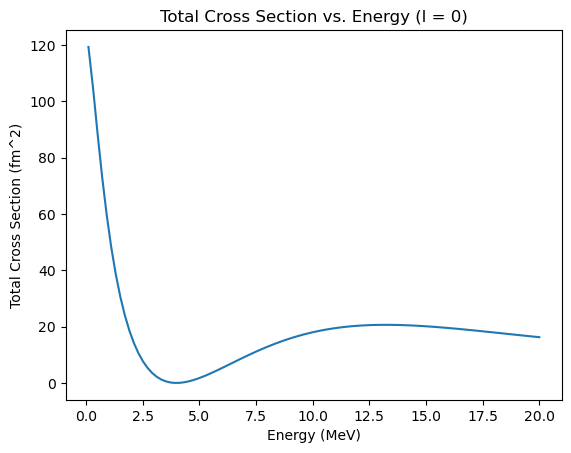

In [7]:
cross_sections = calculate_total_cross_sections(E_values, l_max)

plt.plot(E_values, cross_sections)
plt.xlabel("Energy (MeV)")
plt.ylabel("Total Cross Section (fm^2)")
plt.title(f"Total Cross Section vs. Energy (l = {l_max})")
plt.show()

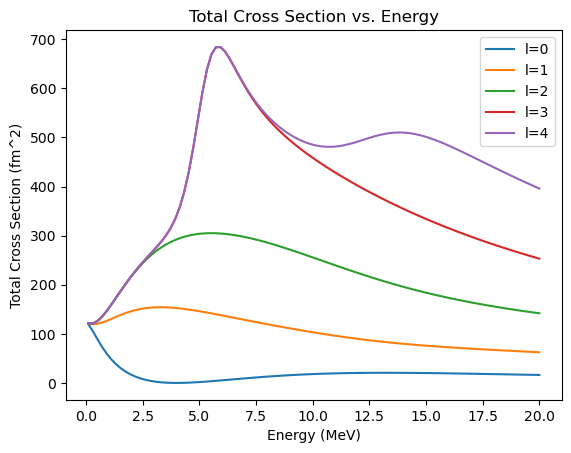

In [9]:
cross_sections_0 = calculate_total_cross_sections(E_values, 0)
cross_sections_1 = calculate_total_cross_sections(E_values, 1)
cross_sections_2 = calculate_total_cross_sections(E_values, 2)
cross_sections_3 = calculate_total_cross_sections(E_values, 3)
cross_sections_4 = calculate_total_cross_sections(E_values, 4)

plt.plot(E_values, cross_sections_0, label='l = 0')
plt.plot(E_values, cross_sections_1, label='l = 1')
plt.plot(E_values, cross_sections_2, label='l = 2')
plt.plot(E_values, cross_sections_3, label='l = 3')
plt.plot(E_values, cross_sections_4, label='l = 4')
plt.xlabel("Energy (MeV)")
plt.ylabel("Total Cross Section (fm^2)")
plt.title("Total Cross Section vs. Energy")
plt.legend()
plt.show()

In [67]:
k_array = np.sqrt(2*mu*E_values / (hbar ** 2))
kappa_array = np.sqrt((2*mu*(E_values-V0))/hbar**2)

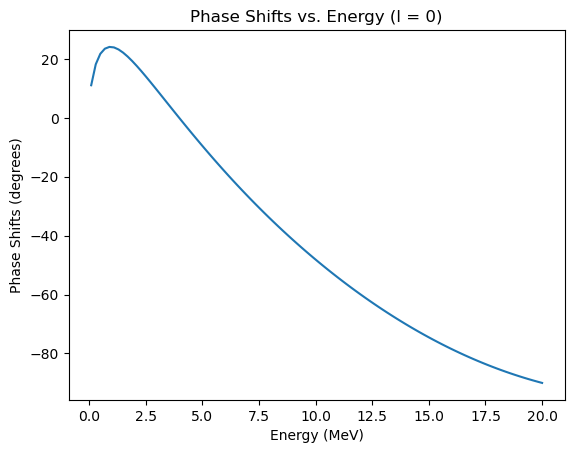

In [68]:
l = 0
phase_shifts = calculate_phase_shift(k_array, kappa_array, l) * 180 / np.pi

plt.plot(E_values, phase_shifts)
plt.xlabel("Energy (MeV)")
plt.ylabel("Phase Shifts (degrees)")
plt.title(f"Phase Shifts vs. Energy (l = {l})")
plt.show()